# Data Visualization

In [115]:
import geopandas as gpd #Library for using Geospatial Dataframes
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns #Library for Data Vizualisation
import pandas as pd

In [116]:
data = pd.read_csv("data/clean_data.csv")

## Light Conditions

###### NOT: Yoğunluğa göre bakılabilir

<Axes: xlabel='Light_Conditions', ylabel='count'>

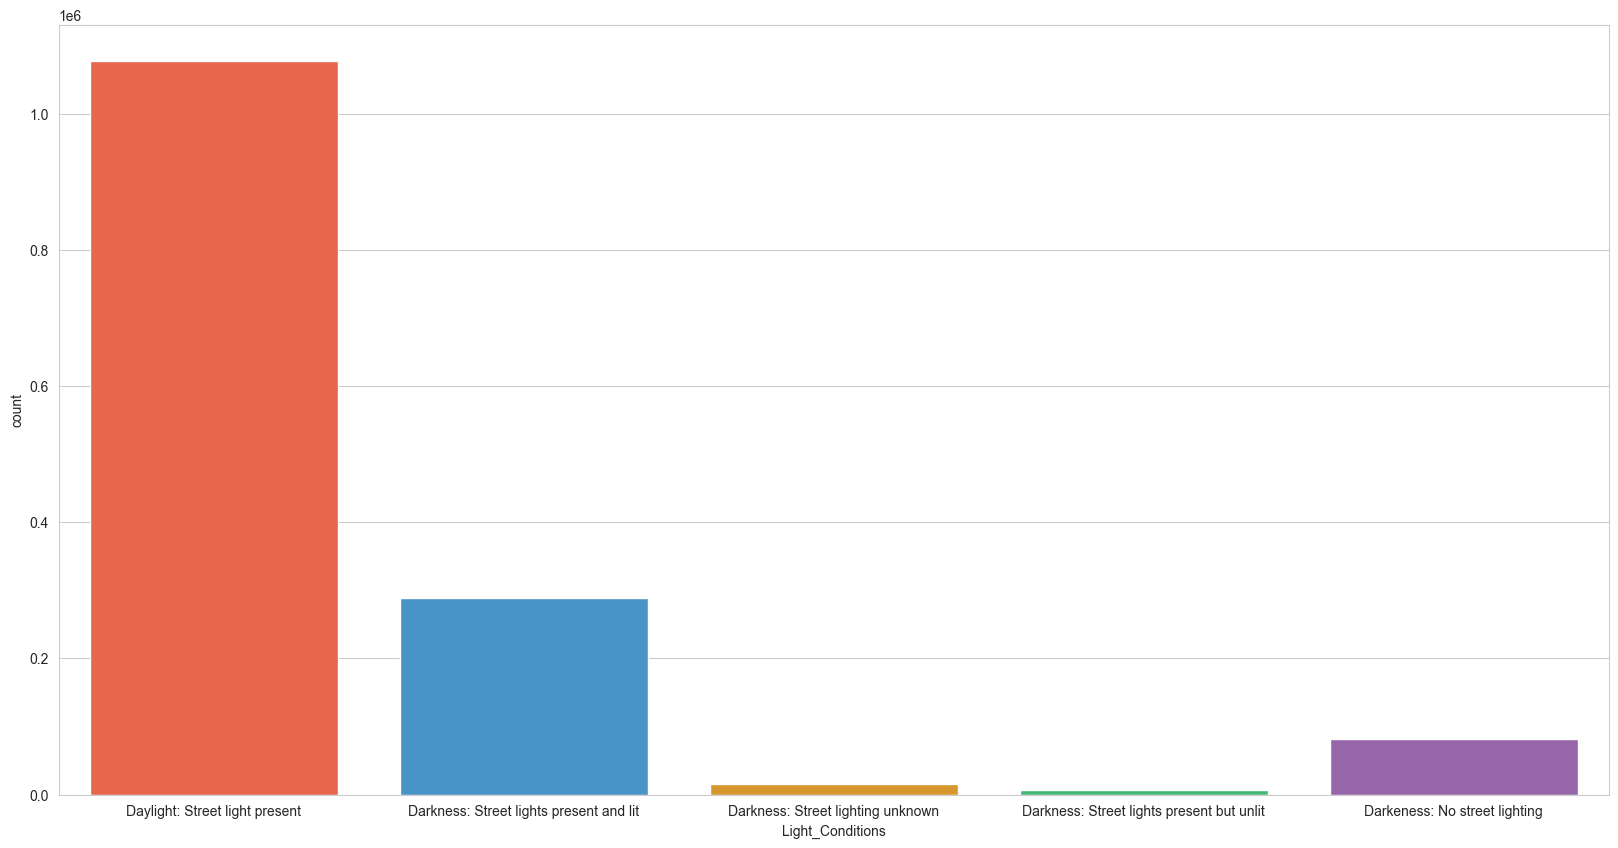

In [117]:
plt.figure(figsize=(20,10))
sns.countplot(
    data,x="Light_Conditions",
    hue="Light_Conditions", 
    legend=False)

##### Işıklandırma verisinin kategorizasyonu

In [118]:
data["Darkness_Presence"]=data["Light_Conditions"].replace([   "Daylight: Street light present",
                                                               "Darkness: Street lights present and lit",
                                                               "Darkness: Street lighting unknown",
                                                               "Darkness: Street lights present but unlit",
                                                               "Darkeness: No street lighting"], 
                                                               [0,1,2,2,2])

In [119]:
data=data.drop(["Light_Conditions"],axis=1)

## Weather Conditions

<Axes: xlabel='Weather_Conditions', ylabel='count'>

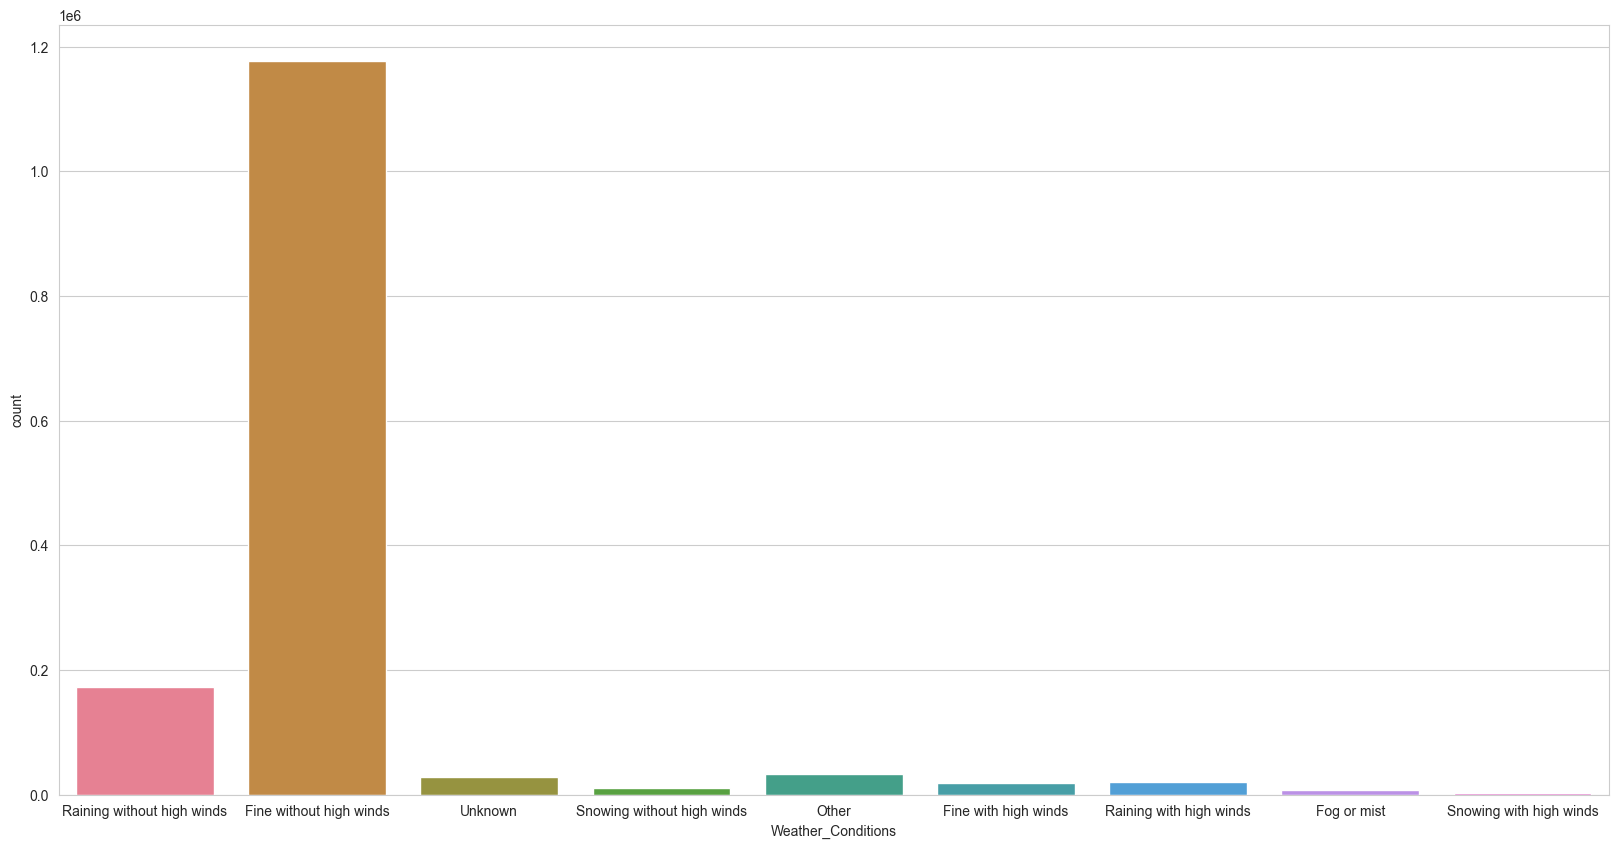

In [120]:
plt.figure(figsize=(20,10))
sns.countplot(
    data,
    x="Weather_Conditions", 
    hue="Weather_Conditions", 
    legend=False)

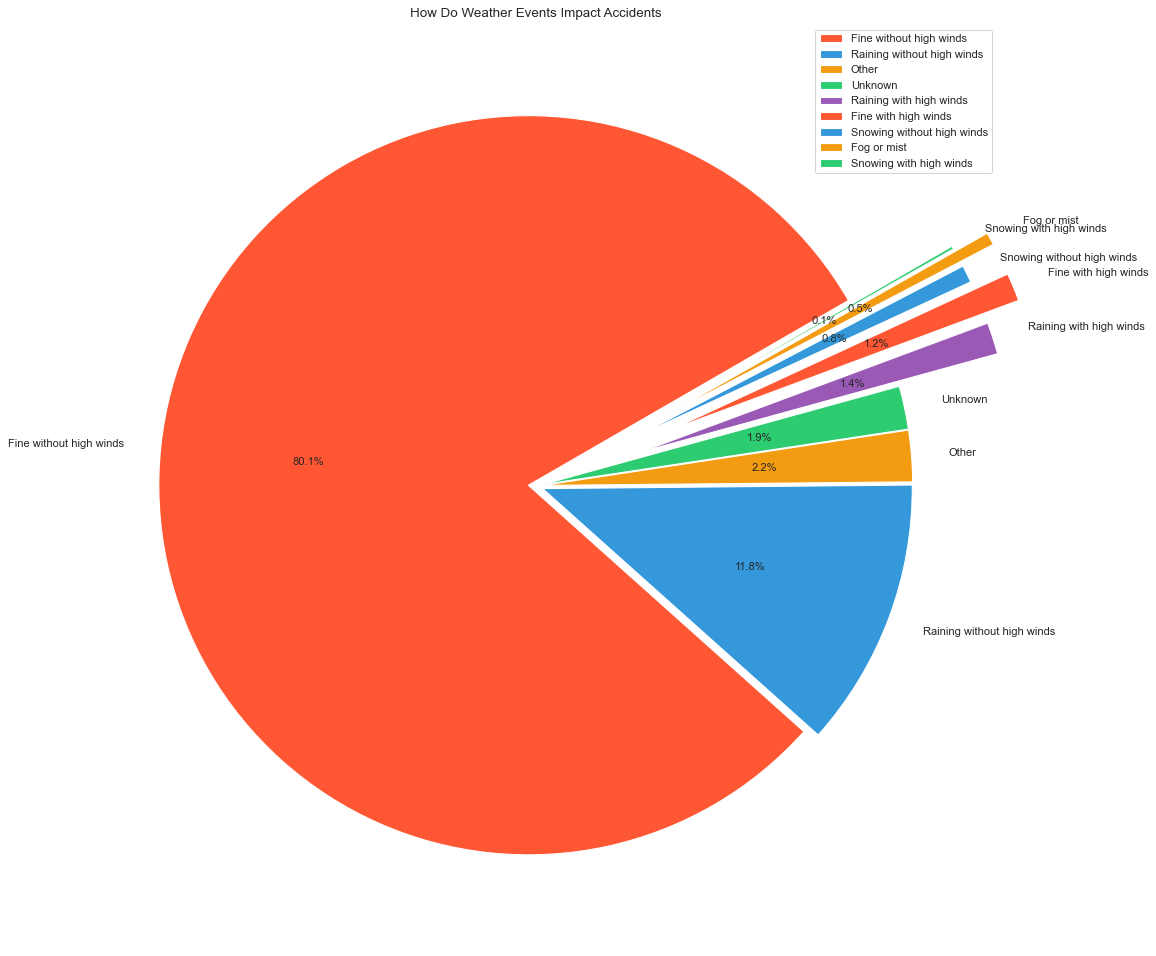

In [121]:
weather_cond = data["Weather_Conditions"].value_counts()

figure(
    figsize=(15, 15), 
    dpi=80)

plt.pie(
    weather_cond.values, 
    labels = weather_cond.index, 
    colors = sns.color_palette(),
    startangle = 30,
    textprops={"size": "medium"},
    explode=(0.02,0.02,0.02,0.02,0.3,0.4,0.3,0.4,0.3),
    autopct="%1.1f%%")
plt.legend()
plt.title("How Do Weather Events Impact Accidents")
plt.show()

##### Hava durumu verisinin kategorizasyonu

In [122]:
data["Weather_Conditions"]=data["Weather_Conditions"].replace(["Raining without high winds", 
                                                               "Fine without high winds",
                                                               "Snowing without high winds", 
                                                               "Other", 
                                                               "Fine with high winds",
                                                               "Raining with high winds", 
                                                               "Fog or mist",
                                                               "Snowing with high winds"],
                                                               ["No High winds",
                                                                "No High winds",
                                                                "No High winds",
                                                                "No High winds",
                                                                "High winds",
                                                                "High winds",
                                                                "Fog",
                                                                "High winds"])

In [123]:
mapping = {
    "No High winds": 0,
    "High winds": 2,
    "Fog": 0,
    "Unknown":0
}

# Use the replace function to convert the column to ordinal values
data["Weather_Conditions"] = data["Weather_Conditions"].replace(mapping)

## Road Conditions

<Axes: xlabel='Road_Surface_Conditions', ylabel='count'>

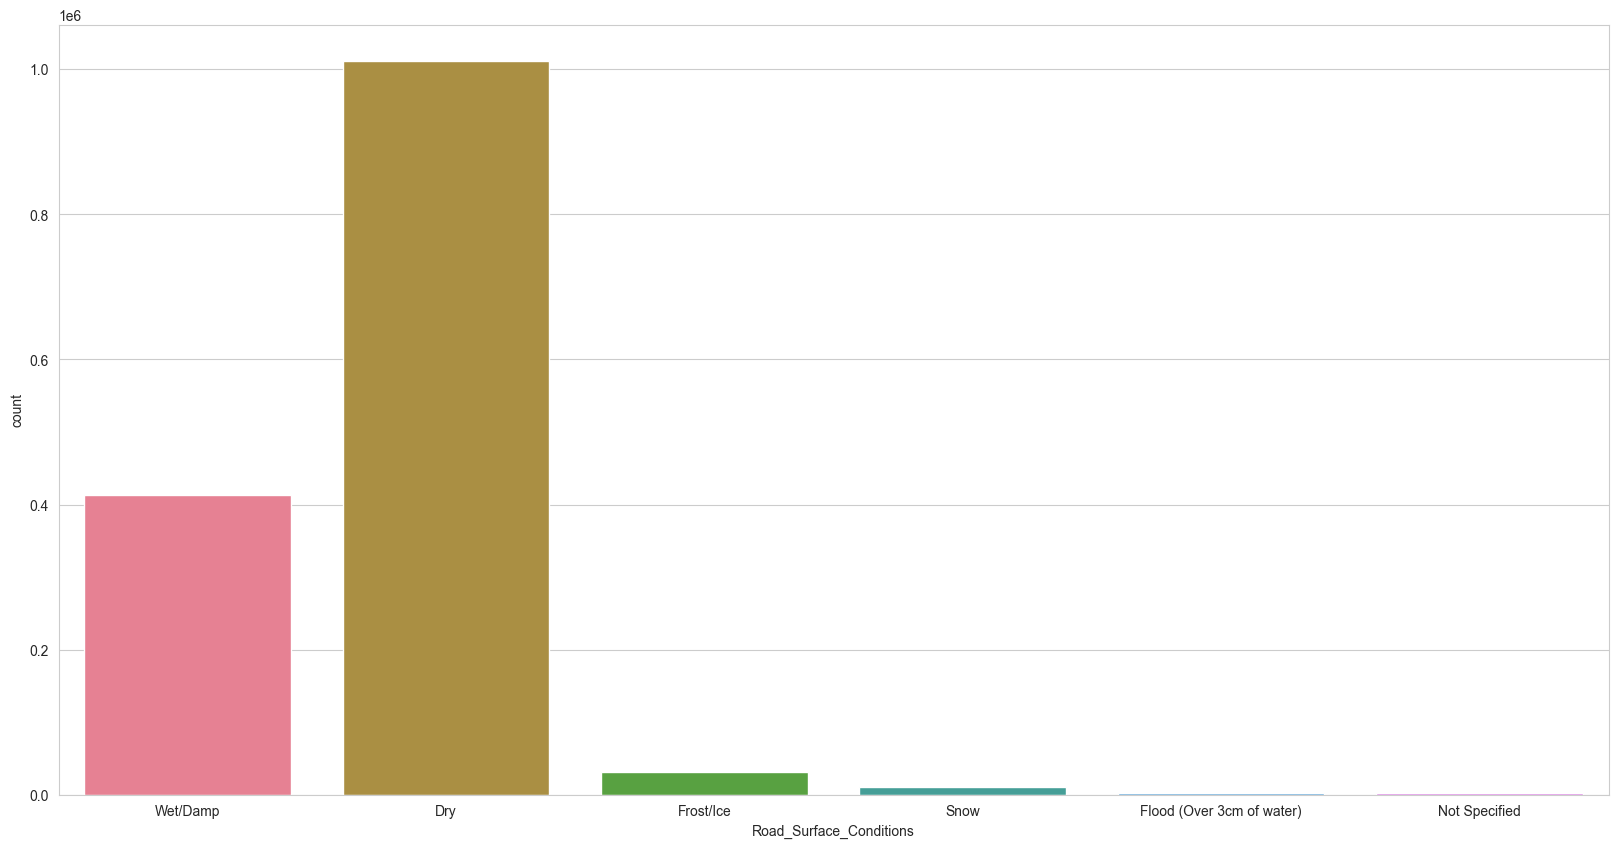

In [124]:
plt.figure(figsize=(20,10))
palette = ["r","g","b","orange","purple"]
sns.countplot(
    data,x="Road_Surface_Conditions",
    hue="Road_Surface_Conditions", 
    legend=False)

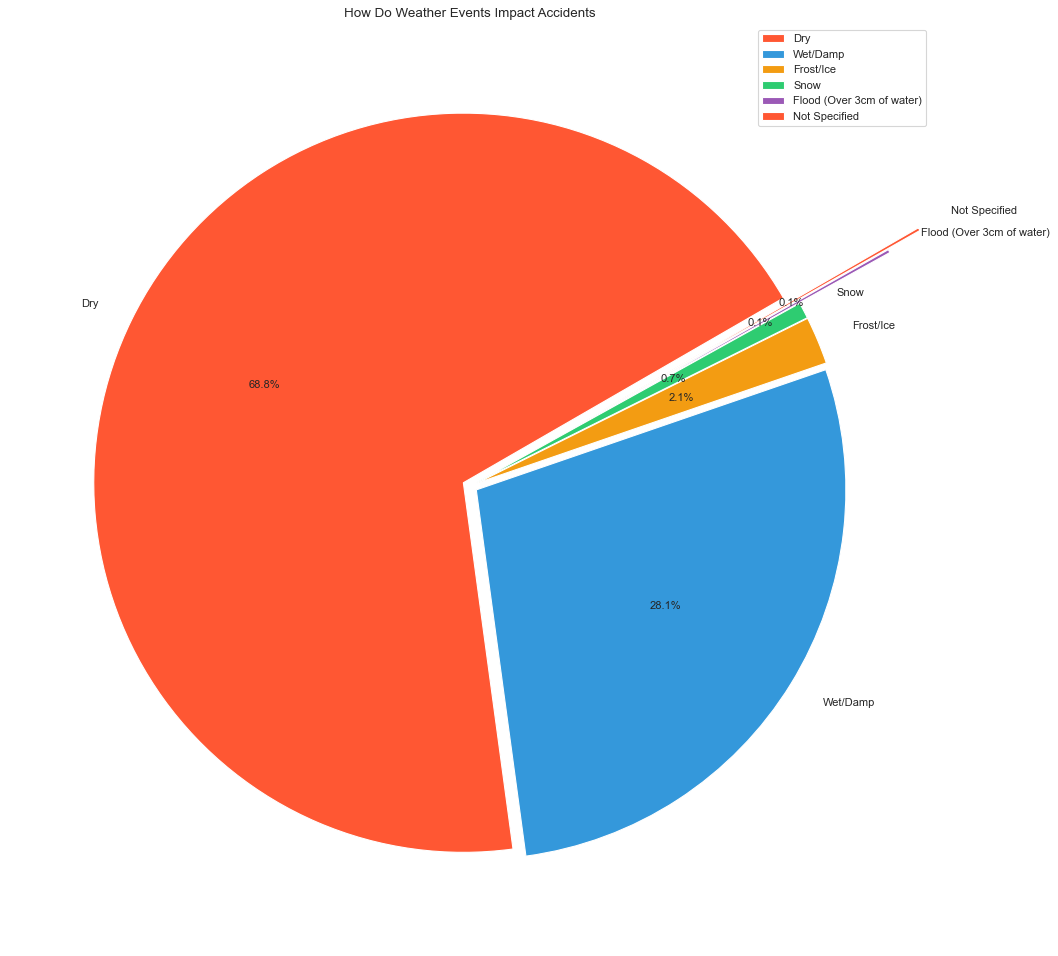

In [125]:
road_cond = data["Road_Surface_Conditions"].value_counts()

figure(
    figsize=(15, 15), 
    dpi=80)

plt.pie(
    road_cond.values, 
    labels = road_cond.index, 
    colors = sns.color_palette(),
    startangle = 30,
    textprops={"size": "medium"},
    explode=(0.02,0.02,0.02,0.02,0.3,0.4),
    autopct="%1.1f%%")
plt.legend()
plt.title("How Do Weather Events Impact Accidents")
plt.show()

In [126]:
#Display different aggregations to evaluate our dataset
def display_aggregation(data, *columns):
    H = list(columns)
    C= list(columns)
    C.append("Accident_Index")
    print(C)
    print(data[C].groupby(by=H).count().sort_values(by=[H[0]]+["Accident_Index"],ascending=[True,False]).to_string())

In [127]:
display_aggregation(data,"Road_Surface_Conditions")

['Road_Surface_Conditions', 'Accident_Index']
                           Accident_Index
Road_Surface_Conditions                  
Dry                               1011250
Flood (Over 3cm of water)            2068
Frost/Ice                           30647
Not Specified                        1932
Snow                                10342
Wet/Damp                           413370


In [128]:
mapping = {
    "Dry": 5,
    "Wet/Damp": 4,
    "Frost/Ice": 3,
    "Snow": 2,
    "Flood (Over 3cm of water)": 1,
    "Not Specified": 0,
    pd.NA:pd.NA
}

# Use the replace function to convert the column to ordinal values
data["Road_Surface_Conditions_Ordinal"] = data["Road_Surface_Conditions"].replace(mapping)

<Axes: xlabel='Road_Surface_Conditions_Ordinal', ylabel='count'>

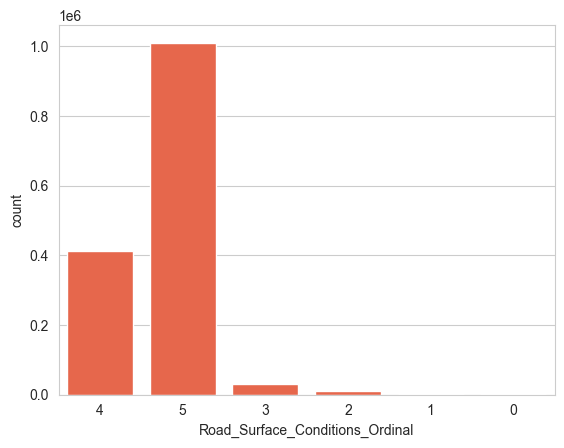

In [129]:
sns.countplot(data,x="Road_Surface_Conditions_Ordinal", order=data["Road_Surface_Conditions_Ordinal"])

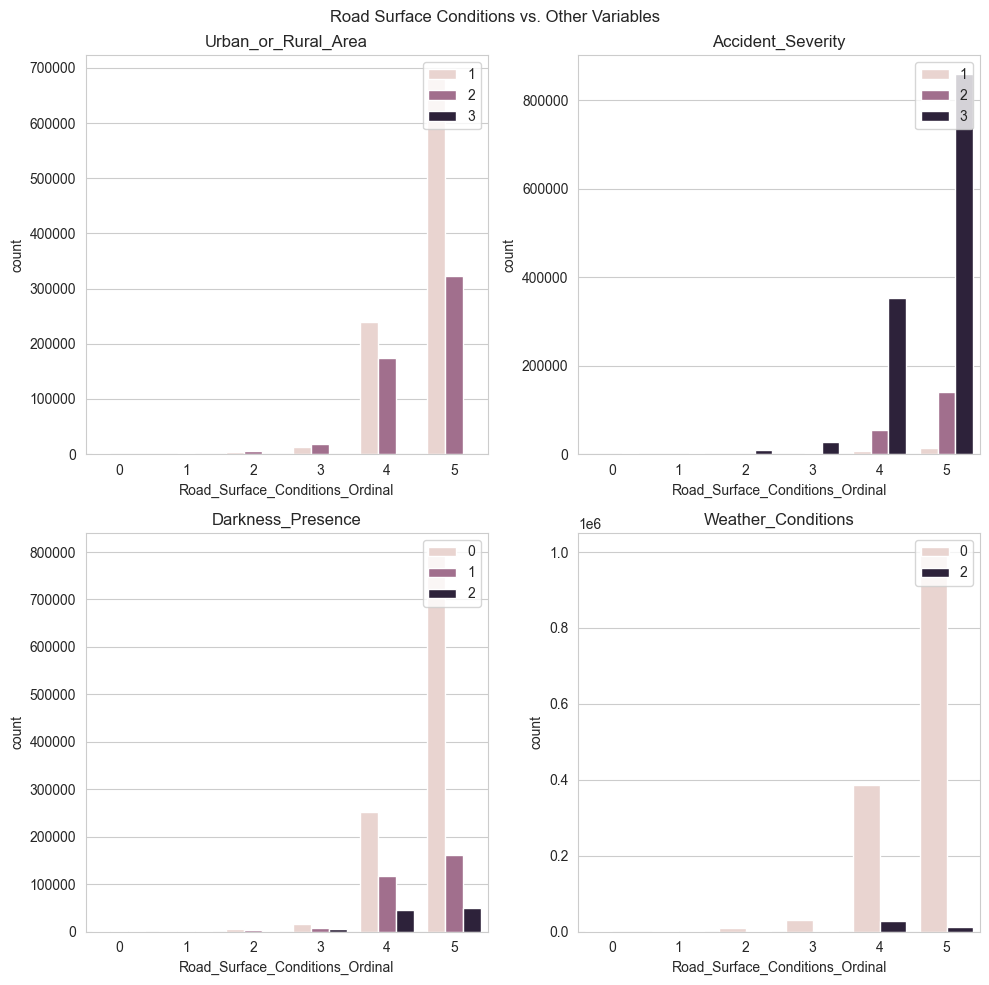

In [130]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
variables = ["Urban_or_Rural_Area", "Accident_Severity","Darkness_Presence", "Weather_Conditions"]

# Loop through each variable and plot a countplot on a separate subplot
for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    sns.countplot(data, x="Road_Surface_Conditions_Ordinal", hue=var, ax=axs[row, col])
    axs[row, col].set_title(var)
    axs[row, col].legend(loc="upper right")  # move the legend to upper right corner

fig.suptitle("Road Surface Conditions vs. Other Variables")

# Adjust the spacing between subplots to avoid overlapping legends
fig.tight_layout()

plt.show()

In [131]:
print("Number_of_Vehicles")
display_aggregation(data,"Road_Surface_Conditions_Ordinal","Number_of_Vehicles")
print(" ")
print("Number_of_Casualties")
display_aggregation(data,"Road_Surface_Conditions_Ordinal","Number_of_Casualties")

Number_of_Vehicles
['Road_Surface_Conditions_Ordinal', 'Number_of_Vehicles', 'Accident_Index']
                                                    Accident_Index
Road_Surface_Conditions_Ordinal Number_of_Vehicles                
0                               2                             1216
                                1                              597
                                3                               97
                                4                               17
                                5                                5
1                               1                             1160
                                2                              741
                                3                              115
                                4                               34
                                5                               12
                                6                                3
                                11

In [132]:
display_aggregation(data,"Road_Surface_Conditions_Ordinal")

['Road_Surface_Conditions_Ordinal', 'Accident_Index']
                                 Accident_Index
Road_Surface_Conditions_Ordinal                
0                                          1932
1                                          2068
2                                         10342
3                                         30647
4                                        413370
5                                       1011250


In [133]:
data_cleaned = data.copy()
data_cleaned["Road_Surface_Conditions"]=data["Road_Surface_Conditions_Ordinal"]
data_cleaned

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Year,Darkness_Presence,Road_Surface_Conditions_Ordinal
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,None within 50 metres,Zebra crossing,0,4,No Special Conditions or Not Specified,No Carriageway Hazards or Not Specified,1,2005,0,4
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,None within 50 metres,Pedestrian phase at traffic signal junction,0,5,No Special Conditions or Not Specified,No Carriageway Hazards or Not Specified,1,2005,1,5
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,None within 50 metres,No physical crossing within 50 meters,0,5,No Special Conditions or Not Specified,No Carriageway Hazards or Not Specified,1,2005,1,5
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,None within 50 metres,No physical crossing within 50 meters,0,5,No Special Conditions or Not Specified,No Carriageway Hazards or Not Specified,1,2005,0,5
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,None within 50 metres,No physical crossing within 50 meters,0,4,No Special Conditions or Not Specified,No Carriageway Hazards or Not Specified,1,2005,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469604,1504145,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,...,None within 50 metres,No physical crossing within 50 meters,0,2,No Special Conditions or Not Specified,No Carriageway Hazards or Not Specified,2,2014,2,2
1469605,1504146,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,...,None within 50 metres,No physical crossing within 50 meters,0,2,No Special Conditions or Not Specified,No Carriageway Hazards or Not Specified,2,2014,2,2
1469606,1504147,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,...,None within 50 metres,No physical crossing within 50 meters,0,3,No Special Conditions or Not Specified,No Carriageway Hazards or Not Specified,2,2014,1,3
1469607,1504148,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,...,None within 50 metres,No physical crossing within 50 meters,0,4,No Special Conditions or Not Specified,No Carriageway Hazards or Not Specified,2,2014,2,4


##### Junction Control

In [134]:
display_aggregation(data,"Junction_Control")

['Junction_Control', 'Accident_Index']
                          Accident_Index
Junction_Control                        
Authorised person                   2422
Automatic traffic signal          150970
Giveway or uncontrolled           715601
Not Specified                     591606
Stop Sign                           9010


##### Number of Vehicles / Number of Casualties

<Axes: xlabel='Number_of_Vehicles', ylabel='Number_of_Casualties'>

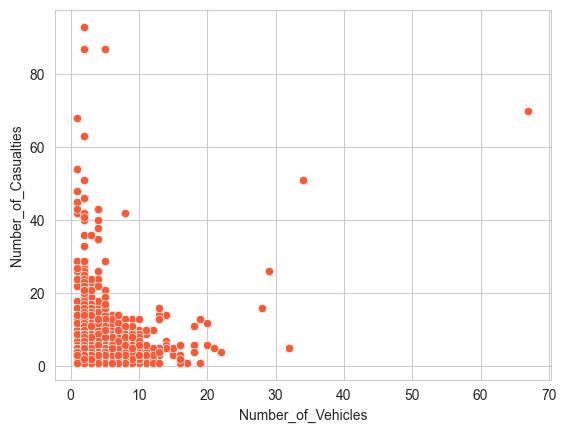

In [135]:
sns.scatterplot(data_cleaned,x="Number_of_Vehicles",y="Number_of_Casualties")

<Axes: ylabel='Number_of_Vehicles'>

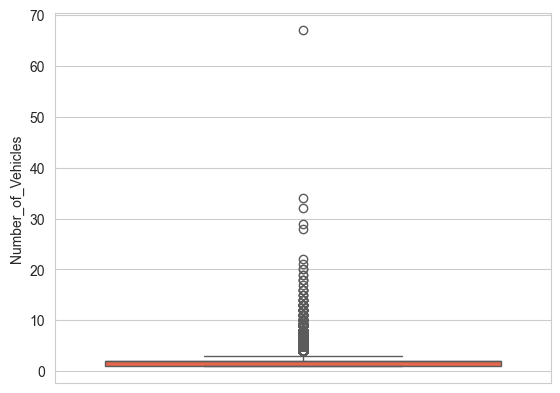

In [136]:
sns.boxplot(data_cleaned["Number_of_Vehicles"])

<Axes: ylabel='Number_of_Casualties'>

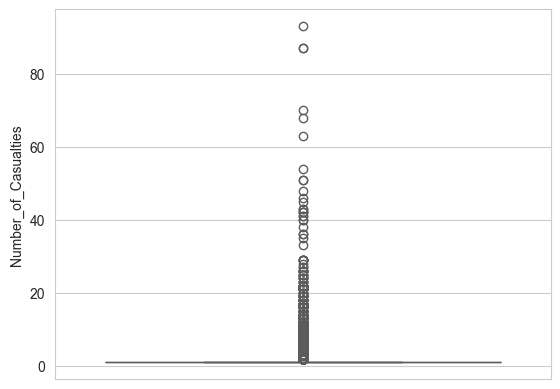

In [137]:
sns.boxplot(data_cleaned["Number_of_Casualties"])

###### Deleting Outliers

In [138]:
data_cleaned=data_cleaned[(data_cleaned["Number_of_Vehicles"]<25)&(data_cleaned["Number_of_Casualties"]<50)]

##### Pedestrian Crossing Human Control & Pedestrian Crossing Physical Facilities

In [139]:
custom_palette = ["#FF5733", "#3498DB", "#F39C12", "#2ECC71", "#9B59B6"]
sns.set_palette(custom_palette)

<Axes: xlabel='Pedestrian_Crossing-Human_Control', ylabel='count'>

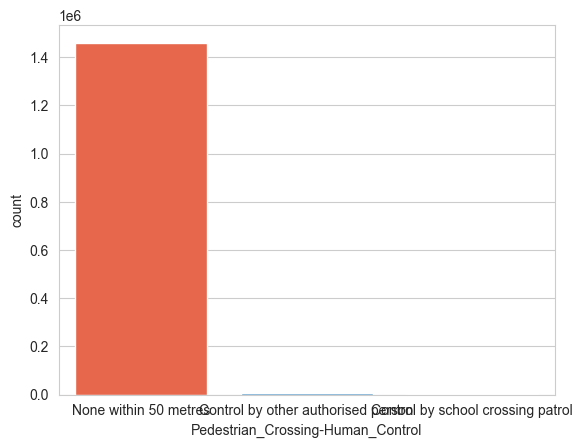

In [140]:
sns.countplot(data_cleaned,x="Pedestrian_Crossing-Human_Control",
              hue="Pedestrian_Crossing-Human_Control")

<Axes: xlabel='Pedestrian_Crossing-Physical_Facilities', ylabel='count'>

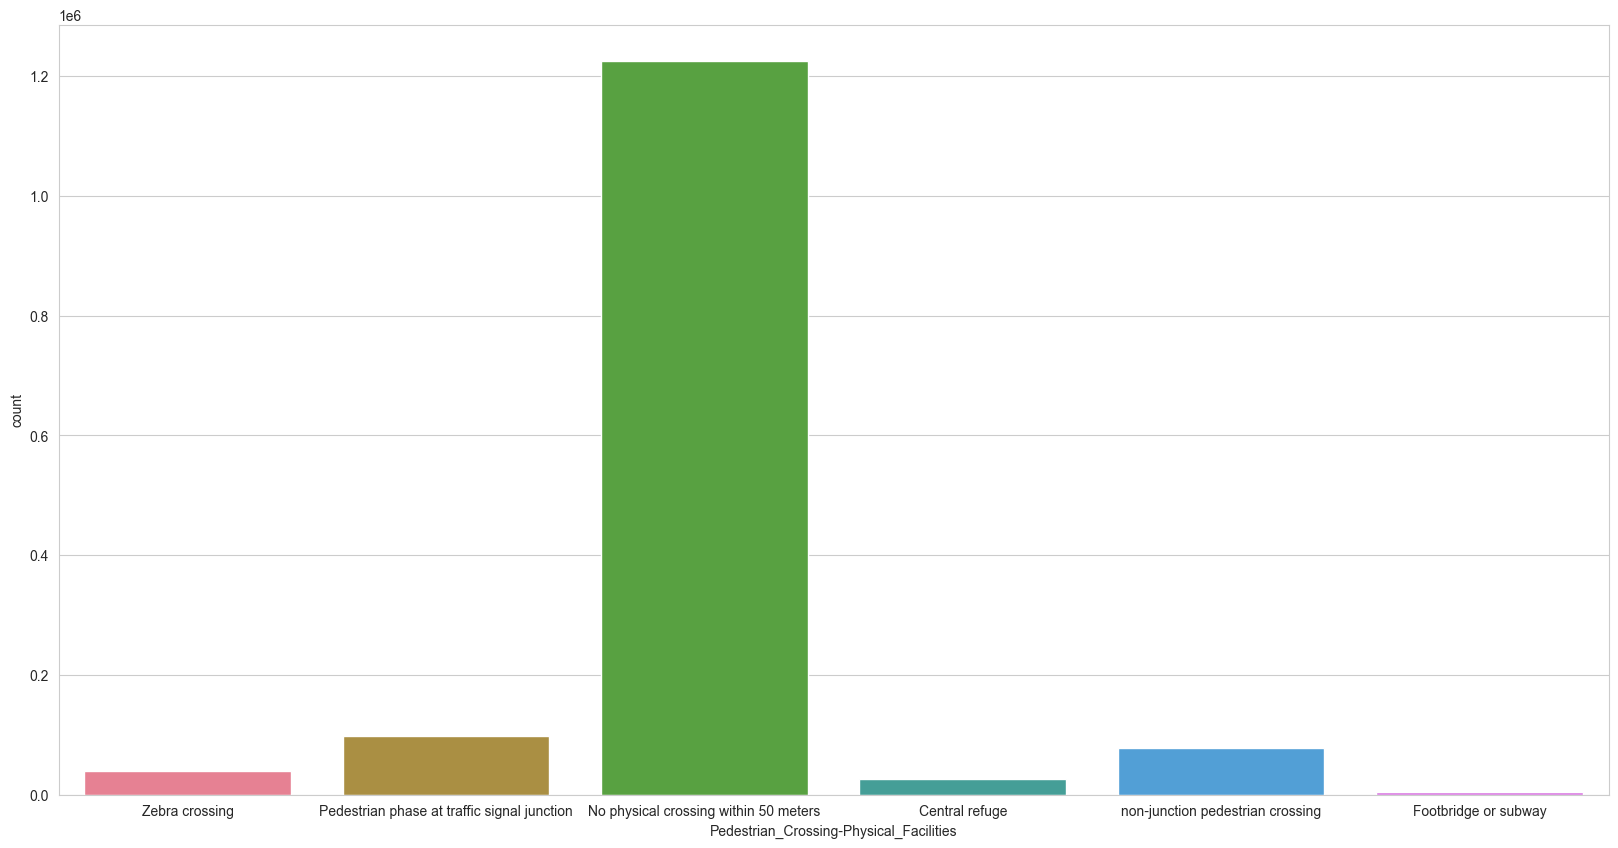

In [141]:
plt.figure(figsize=(20,10))
sns.countplot(data_cleaned,x= "Pedestrian_Crossing-Physical_Facilities", 
              hue="Pedestrian_Crossing-Physical_Facilities")

In [142]:
data_cleaned.groupby(by="Pedestrian_Crossing-Human_Control").size()

Pedestrian_Crossing-Human_Control
Control by other authorised person       5094
Control by school crossing patrol        3550
None within 50 metres                 1460953
dtype: int64

#### Çok anlamlı veri içermedikleri için bu sütunları sildim

In [143]:
data_cleaned=data_cleaned.drop(["Pedestrian_Crossing-Human_Control","Pedestrian_Crossing-Physical_Facilities"],axis=1)

## Accidents Severity

In [144]:
mappings = {
    1:"Killed",
    2:"Serious", 
    3:"Slight"
}
data_copy = data.copy()

data_copy["Accident_Severity_Index"] = data_copy["Accident_Severity"].map(mappings)

<Axes: xlabel='Accident_Severity', ylabel='count'>

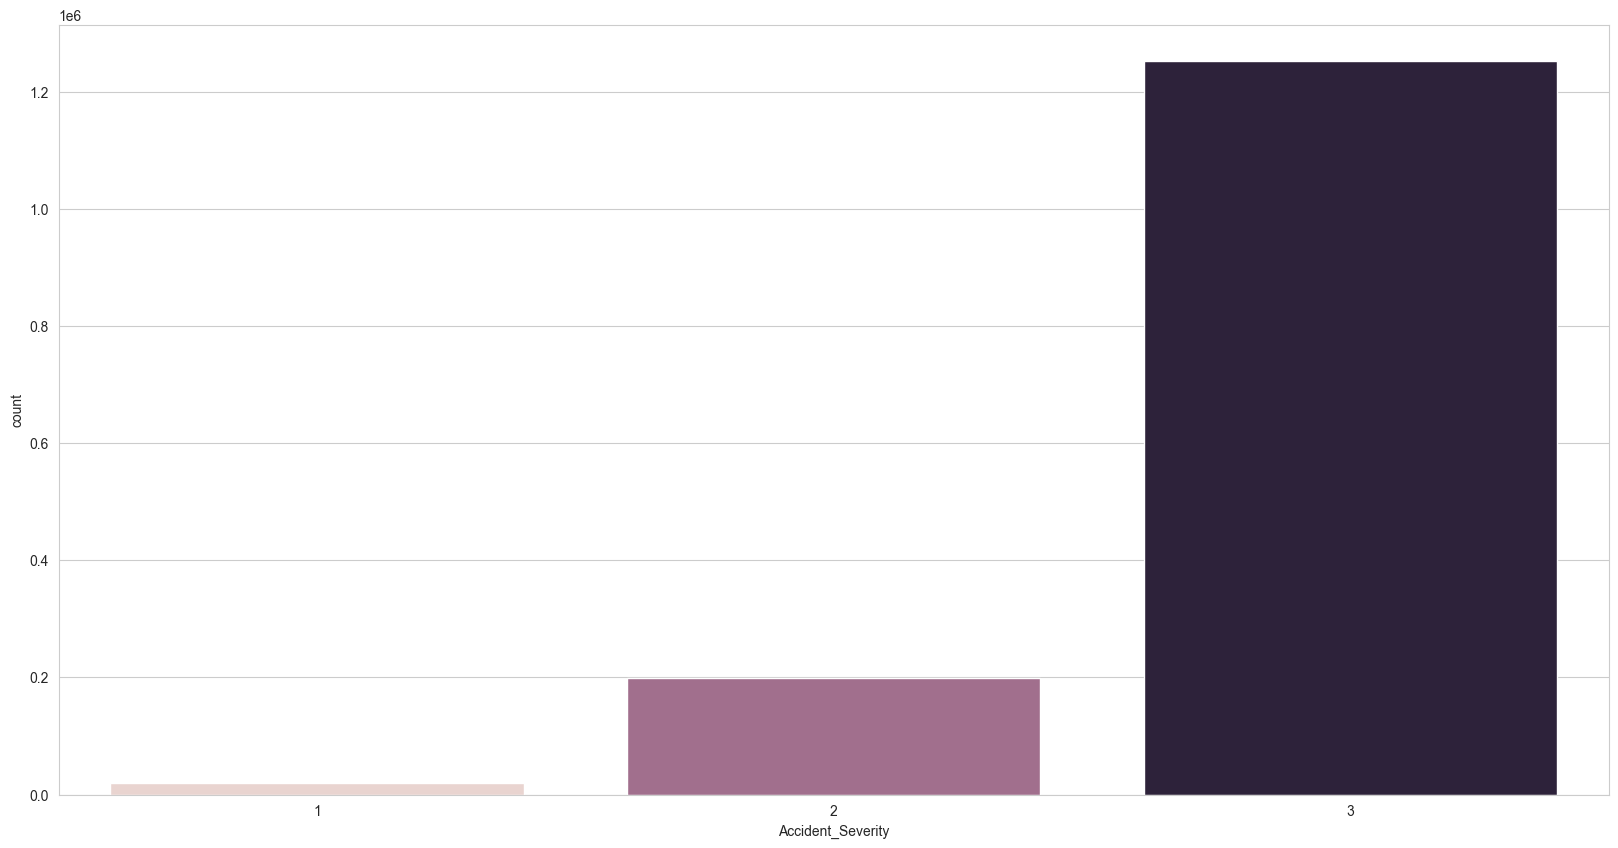

In [145]:
plt.figure(figsize=(20,10))
sns.countplot(
    data_copy,
    x="Accident_Severity",
    hue="Accident_Severity", 
    legend=False)

<Axes: xlabel='Accident_Severity_Index', ylabel='count'>

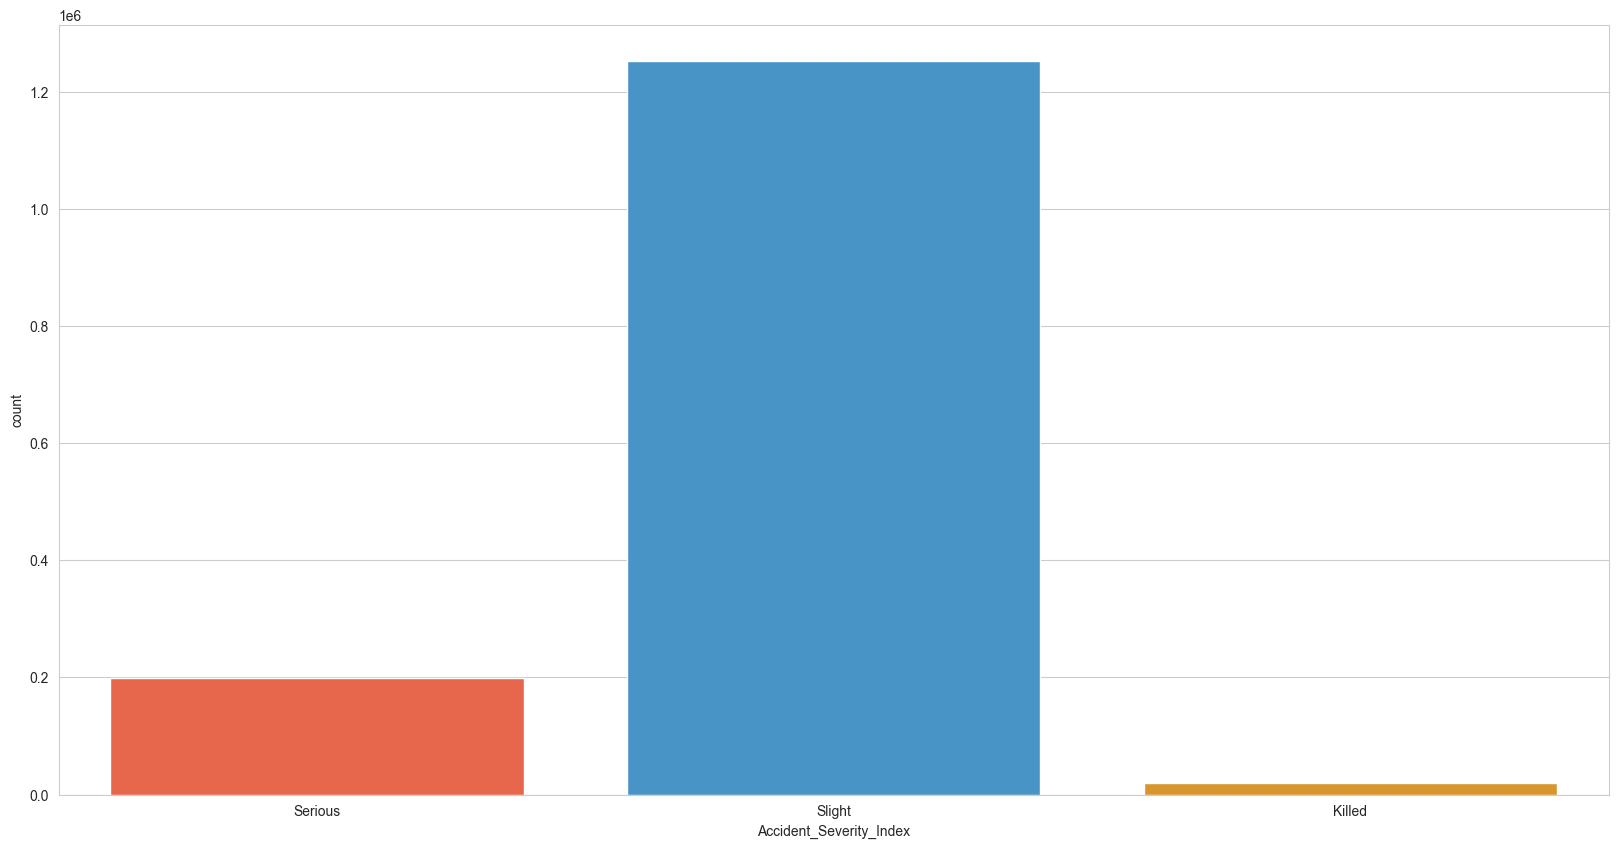

In [146]:
plt.figure(figsize=(20,10))
sns.countplot(
    data_copy,
    x="Accident_Severity_Index",
    hue="Accident_Severity_Index", 
    legend=False)

## Accidents by year and weekdays

In [147]:
mappings = {
    1:"Monday",
    2:"Tuesday", 
    3:"Wednesday",
    4:"Thursday",
    5:"Friday", 
    6:"Saturday",
    7:"Sunday"
}
data_copy1 = data.copy()

data_copy1["Day_of_Week_Index"] = data_copy1["Day_of_Week"].map(mappings)
week1 = data_copy1["Day_of_Week_Index"].value_counts()
sorter = ["Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
week2 = week1.reindex(sorter)
week2.index

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object', name='Day_of_Week_Index')

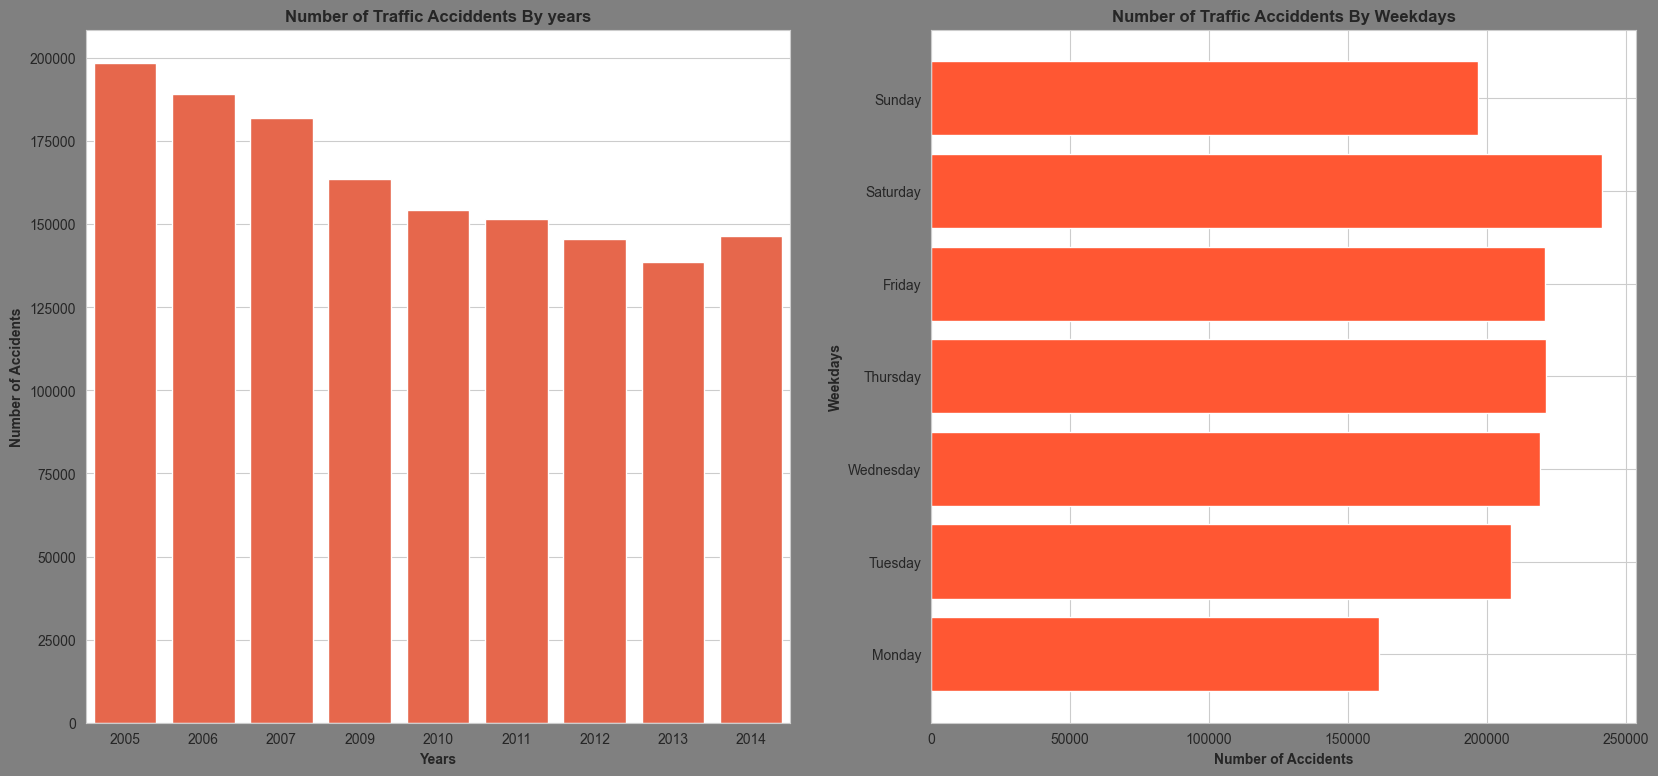

In [148]:
year = data["Year"].value_counts()
week = data["Day_of_Week"].value_counts()
week1 = data_copy1["Day_of_Week_Index"].value_counts()

plt.figure(figsize = (20,9),facecolor="grey")
plt.subplot(1, 2, 1)

sns.barplot(x = year.index, y = year.values)
plt.ylabel("Number of Accidents",weight="bold")
plt.xlabel("Years",weight="bold")

plt.title("Number of Traffic Acciddents By years",weight="bold")

plt.subplot(1, 2, 2)

plt.barh(week2.index,week2.values)
plt.title("Number of Traffic Acciddents By Weekdays",weight="bold")
plt.xlabel("Number of Accidents",weight="bold")
plt.ylabel("Weekdays",weight="bold")
plt.show()

In [149]:
#Get Month as a temporary column
data["int-Date"]=data["Date"].apply(lambda x:int(x[3:5]))
#Get Hour as a temporary column
data["int-Time"]=data["Time"].apply(lambda x:int(str(x)[0:2]))

In [150]:
display_aggregation(data_cleaned,"Day_of_Week","Accident_Severity")

['Day_of_Week', 'Accident_Severity', 'Accident_Index']
                               Accident_Index
Day_of_Week Accident_Severity                
1           3                          132365
            2                           25887
            1                            3019
2           3                          179436
            2                           26882
            1                            2486
3           3                          188585
            2                           27944
            1                            2447
4           3                          190725
            2                           28013
            1                            2384
5           3                          189646
            2                           28846
            1                            2511
6           3                          206803
            2                           31842
            1                            2885
7           3            

#### 2nd Road Class

<Axes: xlabel='Accident_Severity', ylabel='count'>

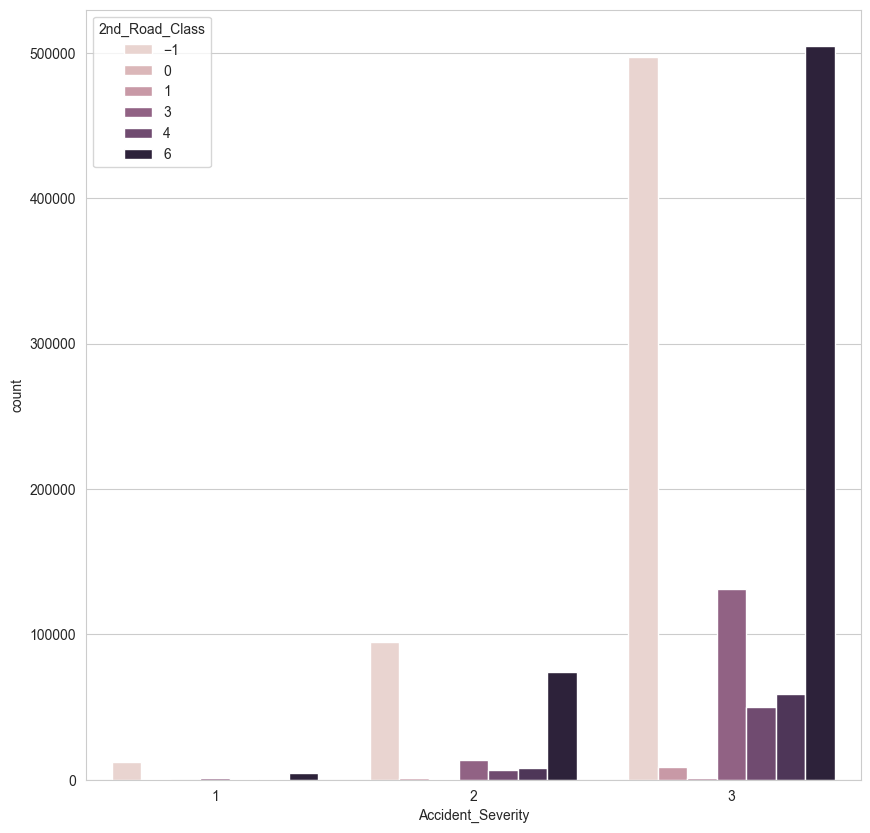

In [151]:
plt.figure(figsize=(10,10))
sns.countplot(data_cleaned,hue="2nd_Road_Class",x="Accident_Severity")

<Axes: xlabel='Accident_Severity', ylabel='count'>

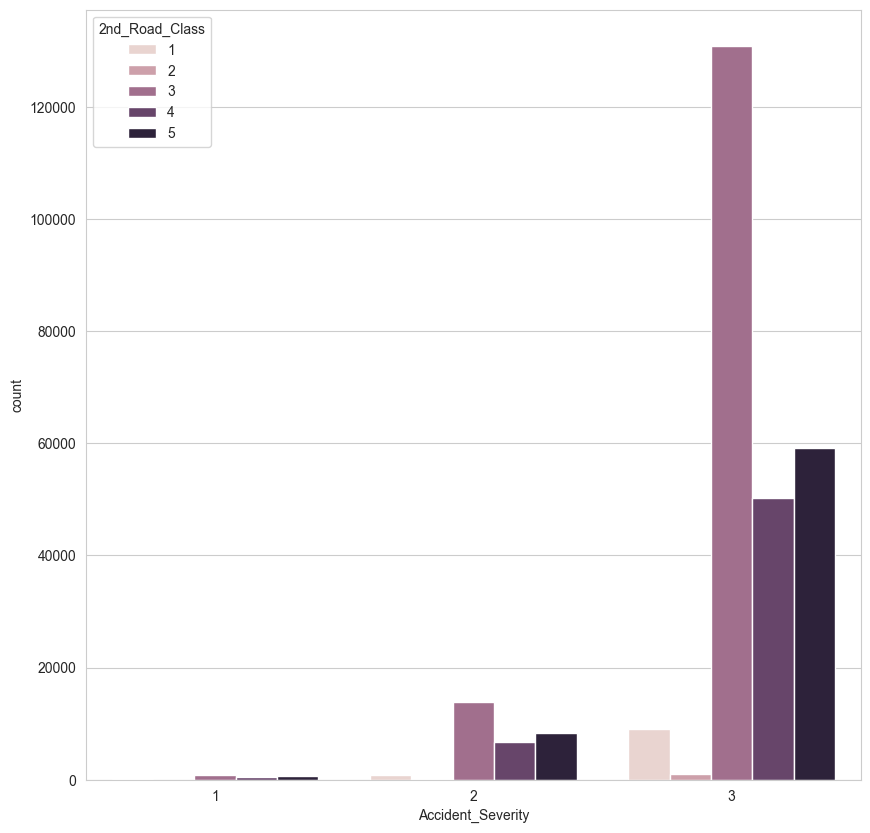

In [152]:
plt.figure(figsize=(10,10))
data_test=data_cleaned[(data_cleaned["2nd_Road_Class"].isin([-1,6]))==False]
sns.countplot(data_test,hue="2nd_Road_Class",x="Accident_Severity")

##### Çok anlamlı veri içermediği için 2nd Road Class sütununu sildim.

In [153]:
data_cleaned=data_cleaned.drop(["2nd_Road_Class","2nd_Road_Number"],axis=1)

#### Special Conditions at Site

In [154]:
data_cleaned.groupby(by=["Special_Conditions_at_Site"]).size()

Special_Conditions_at_Site
Auto traffic signal partly defective                   755
Auto traffic singal out                               2742
Mud                                                   4544
No Special Conditions or Not Specified             1433688
Ol or diesel                                          5136
Permanent sign or marking defective or obscured       2218
Road surface defective                                3603
Roadworks                                            16911
dtype: int64

<Axes: xlabel='Accident_Severity', ylabel='count'>

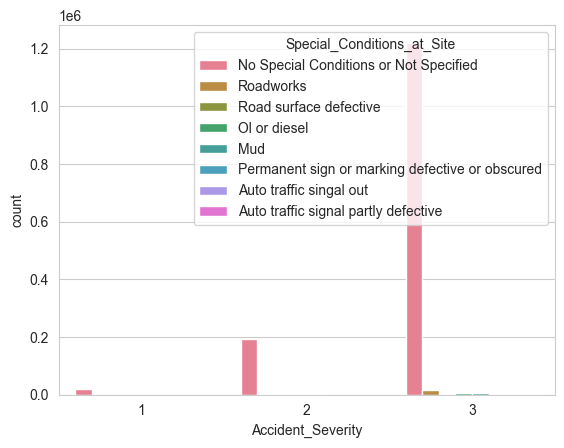

In [155]:
sns.countplot(data_cleaned.loc[data_cleaned["Special_Conditions_at_Site"]!="None"],hue="Special_Conditions_at_Site",x="Accident_Severity")

### Veri incelendi ve görselleştirildi. Elde edilen sonuçlara göre son temizleme işlemleri yapıldı.

In [156]:
data_cleaned.to_csv("data/data_cleaned.csv")

In [157]:
final_data=data_cleaned.drop(["Local_Authority_(District)",
                              "Local_Authority_(Highway)",
                              "Carriageway_Hazards",
                              "Accident_Index",
                              "Police_Force",
                              "1st_Road_Number"],
                            axis=1)

In [158]:
final_data["datetime"] = pd.to_datetime(final_data["Date"] + " " + final_data["Time"], format="%d/%m/%Y %H:%M")

# convert the datetime column to ISO 8601 format
final_data["datetime"] = final_data["datetime"].dt.strftime("%Y-%m-%dT%H:%M:%S.%fZ")

In [162]:
final_data=final_data.drop(["Date","Time","Location_Easting_OSGR","Location_Northing_OSGR","Day_of_Week","Road_Surface_Conditions"],axis=1)

In [163]:
final_data=final_data.drop(["Unnamed: 0"],axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
# final_data=final_data.drop(["int-Time","int-Date"],axis=1)

In [164]:
final_data.head()

,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,1st_Road_Class,Road_Type,Speed_limit,Junction_Control,Weather_Conditions,Special_Conditions_at_Site,Urban_or_Rural_Area,Year,Darkness_Presence,Road_Surface_Conditions_Ordinal,datetime
0,-0.191170,51.489096,2,1,1,3,Single carriageway,30,Not Specified,0,No Special Conditions or Not Specified,1,2005,0,4,2005-01-04T17:42:00.000000Z
1,-0.211708,51.520075,3,1,1,4,Dual carriageway,30,Automatic traffic signal,0,No Special Conditions or Not Specified,1,2005,1,5,2005-01-05T17:36:00.000000Z
2,-0.206458,51.525301,3,2,1,5,Single carriageway,30,Not Specified,0,No Special Conditions or Not Specified,1,2005,1,5,2005-01-06T00:15:00.000000Z
3,-0.173862,51.482442,3,1,1,3,Single carriageway,30,Not Specified,0,No Special Conditions or Not Specified,1,2005,0,5,2005-01-07T10:35:00.000000Z
4,-0.156618,51.495752,3,1,1,6,Single carriageway,30,Not Specified,0,No Special Conditions or Not Specified,1,2005,2,4,2005-01-10T21:13:00.000000Z
